In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from sklearn.datasets import make_blobs
X,y = make_blobs(centers=4, n_samples=200, random_state=0, cluster_std=0.7)
print(X[:10],y[:10])

[[ 2.26403424  1.82613379]
 [-0.97647444  2.59138889]
 [ 1.10046838  4.02254067]
 [-2.82715074  7.11970523]
 [ 1.53393915  0.31915668]
 [ 0.98362009  5.55389667]
 [-1.74452433  2.98606238]
 [ 0.35482006  2.9172298 ]
 [ 1.83747356  5.14545322]
 [ 1.48663347  4.39407536]] [1 2 0 3 1 0 2 0 0 0]


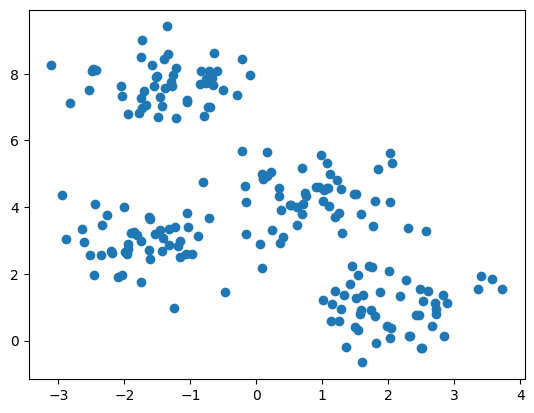

In [ ]:
plt.scatter(X[:,0],X[:,1]);

In [ ]:
from sklearn.cluster import KMeans
model = KMeans(4)
model.fit(X)
print(model.cluster_centers_)

[[ 2.07464749  0.9869902 ]
 [-1.36512238  7.70188306]
 [ 0.8965512   4.36602968]
 [-1.64019917  2.91564301]]


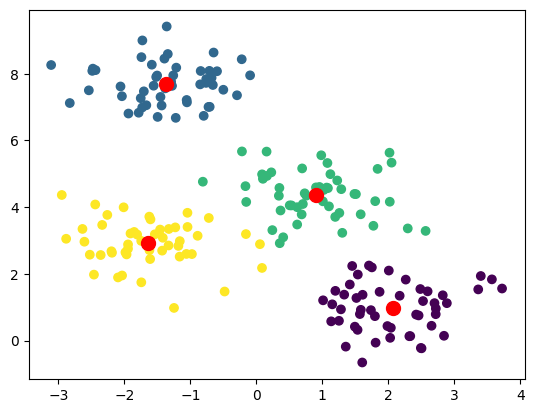

In [ ]:
plt.scatter(X[:,0],X[:,1], c=model.labels_);
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], s=100, color="red"); # Show the centres

In [ ]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y, model.labels_)
print("Accuracy score is", acc)

Accuracy score is 0.0


In [ ]:
import scipy
def find_permutation(n_clusters, real_labels, labels):
    """
    Finds the permutation mapping cluster labels to real labels.

    Args:
        n_clusters (int): Number of clusters.
        real_labels (array-like): True labels of the data.
        labels (array-like): Cluster labels assigned by the clustering algorithm.

    Returns:
        list: Permutation mapping cluster labels to real labels.
    """
    permutation = []
    for i in range(n_clusters):
        idx = labels == i
        # Check if real_labels[idx] is not empty before applying mode
        if real_labels[idx].size > 0:
            # Choose the most common label among data points in the cluster
            # Fix: Access the mode value directly using .mode[0] if it's not a scalar
            mode_result = scipy.stats.mode(real_labels[idx])
            new_label = mode_result.mode[0] if isinstance(mode_result.mode, np.ndarray) else mode_result.mode
        else:
            # Handle the case where real_labels[idx] is empty (e.g., no data points in the cluster)
            new_label = -1  # or any other appropriate value
        permutation.append(new_label)
    return permutation

In [ ]:
permutation = find_permutation(4, y, model.labels_)
print(permutation)

[1, 3, 0, 2]


In [ ]:
new_labels = [ permutation[label] for label in model.labels_]   # permute the labels
print("Accuracy score is", accuracy_score(y, new_labels))

Accuracy score is 1.0


In [ ]:
from sklearn.datasets import make_moons
X,y = make_moons(200, noise=0.05, random_state=0)

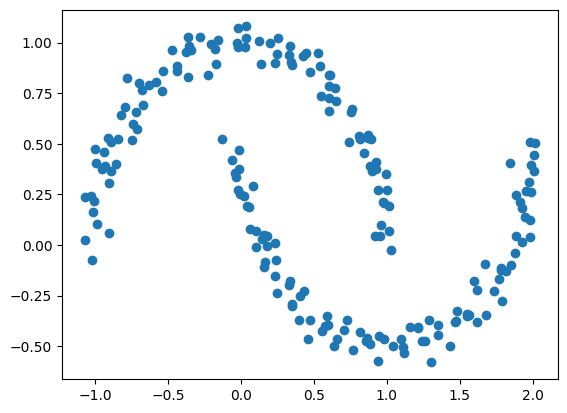

In [ ]:
plt.scatter(X[:,0], X[:,1]);

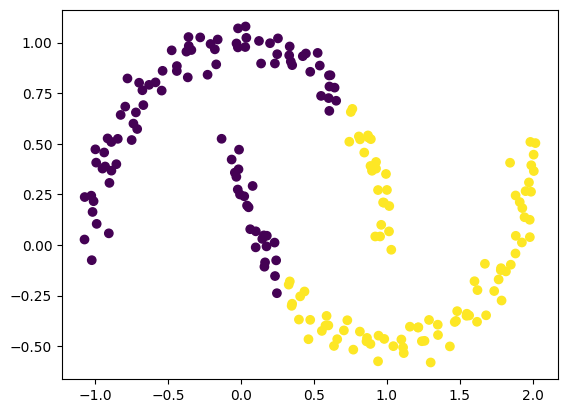

In [ ]:
model=KMeans(2)
model.fit(X)
plt.scatter(X[:,0], X[:,1], c=model.labels_);

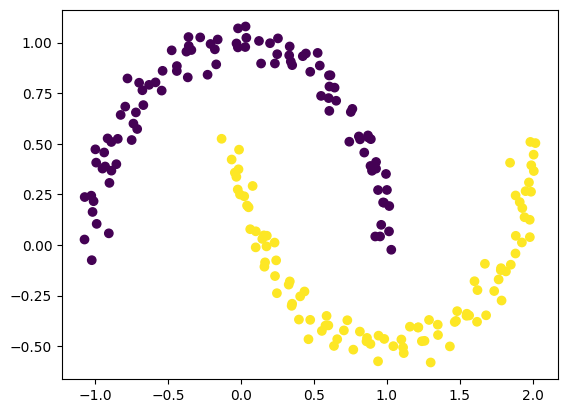

In [ ]:
from sklearn.cluster import DBSCAN
model = DBSCAN(eps=0.3)
model.fit(X)
plt.scatter(X[:,0], X[:,1], c=model.labels_);

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

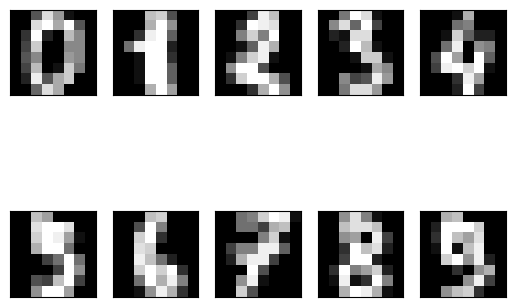

In [ ]:
fig, axes = plt.subplots(2,5, subplot_kw=dict(xticks=[], yticks=[]))
for ax, digit in zip(axes.flat, digits.data[:10]):
    ax.imshow(digit.reshape(8,8), cmap="gray")

In [ ]:
model=KMeans(n_clusters = 10, random_state=0)
model.fit(digits.data)
model.cluster_centers_.shape

(10, 64)

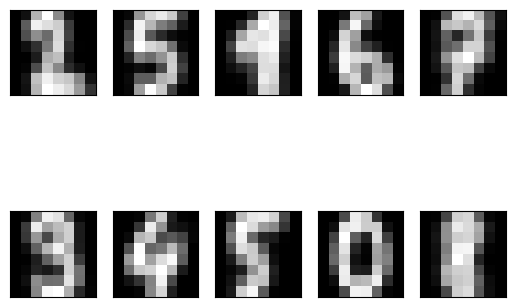

In [ ]:
fig, axes = plt.subplots(2,5, subplot_kw=dict(xticks=[], yticks=[]))
for ax, digit in zip(axes.flat, model.cluster_centers_):
    ax.imshow(digit.reshape(8,8), cmap="gray")

In [ ]:
permutation3 = find_permutation(10, digits.target, model.labels_)
print(permutation3)
acc = accuracy_score(digits.target, [ permutation3[label] for label in model.labels_])
print("Accuracy score is", acc)

[2, 5, 1, 6, 7, 3, 4, 5, 0, 8]
Accuracy score is 0.7440178074568725
